## Продвинутое программирование на Python. Уровень Advanced  Модуль 1.1. Визуализация данных  9. Закрепление знаний

Итак, банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента. 

<div class='alert alert-info'>
→ Вам предстоит подготовить мини-отчёт о проделанной работе в виде ноутбука, который вы предоставите ментору для проверки. Отчёт должен содержать ответы на приведённые ниже вопросы в виде графика и подробных выводов, которые вы можете сделать, исходя из него.

→ Для визуализации вы можете использовать любую из изученных библиотек.

→ Перед выполнением задания обязательно подумайте, какие признаки в данных являются числовыми, а какие — категориальными. Это поможет вам построить правильный график (ещё раз взгляните на схему выбора графика).

→ При выполнении заданий обязательно придерживайтесь критериев правильной визуализации, приведённых в юните
</div>

В качестве ответа вставьте в форму ниже ссылку на ноутбук или сам файл в формате IPYNB. Ментор проверит ваше решение и даст свою оценку и комментарии.

<div class='alert alert-info'>
→ В файле должно содержаться 10 графиков — 10 ответов к заданиям.

→ Каждый график и преобразования к нему выполняются в отдельной ячейке.

→ Под графиком вы должны предоставить свой ответ на вопрос по нему и, если это требуется, выводы, которые вы можете сделать, исходя из графика.
</div>

### Импорт библиотек и данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import scipy 
import matplotlib.ticker as mticker

In [75]:
churn_data = pd.read_csv('data/churn.zip')
display(churn_data.head())
display(churn_data.describe(include='all'))
print(churn_data.info())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


### Задачи

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

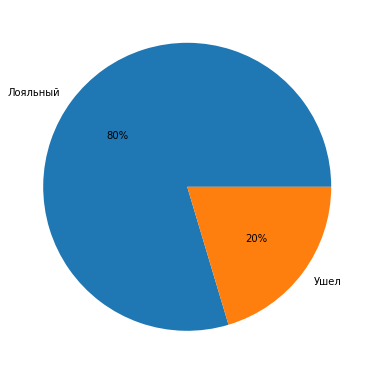

In [4]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.pie(
    churn_data['Exited'].value_counts(),
    labels=['Ушел' if x==1 else 'Лояльный' for x in churn_data['Exited'].value_counts().index],
    autopct='%.0f%%',
)
plt.show()

Дисбаланс целевого признака 4 лояльных к 1 нелояльному

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

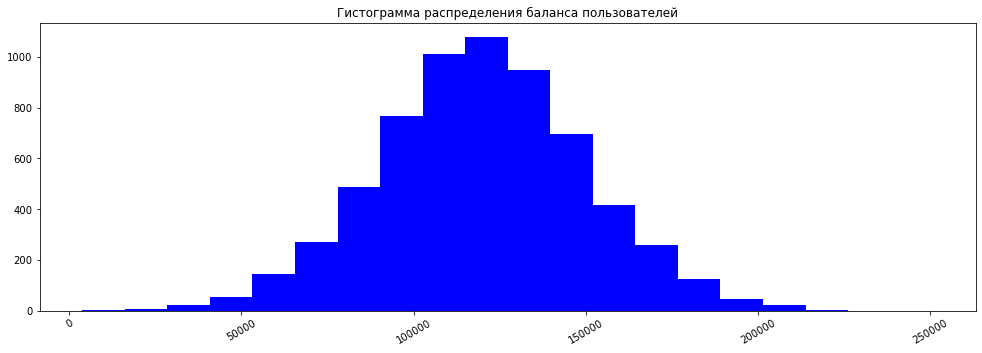

In [87]:
fig = plt.figure(figsize=(13, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.hist(x=churn_data[churn_data['Balance']>2_500]['Balance'],
        label='Баланс',
        color='blue',
        bins=20)
ax.set_title('Гистограмма распределения баланса пользователей')
ax.xaxis.set_tick_params(rotation=30)

Распределение выглядит нормально

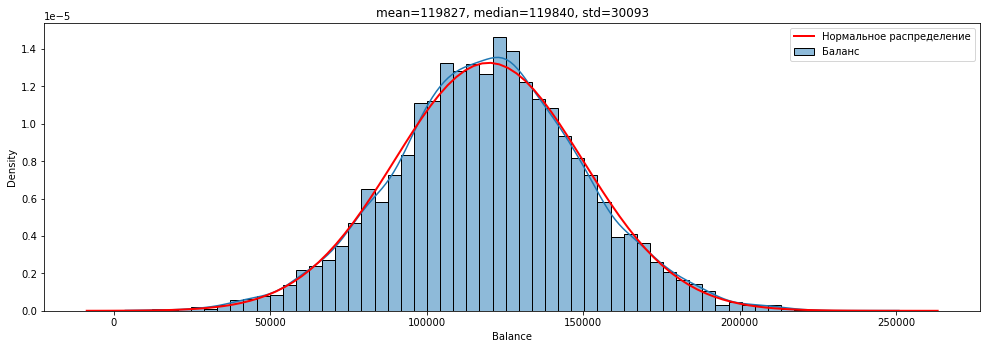

In [151]:
fig = plt.figure(figsize=(13, 4))
ax = fig.add_axes([0, 0, 1, 1])
sns.histplot(
    data=churn_data[churn_data['Balance']>2_500],
    stat='density',
    x='Balance',
    #bins=25,
    kde=True,
    ax=ax,
    label='Баланс'
)
x = churn_data[churn_data['Balance']>2_500]['Balance'].to_numpy()
x0, x1 = ax.get_xlim()  
x_pdf = np.linspace(x0, x1, 100) 
y_pdf = scipy.stats.norm.pdf(x_pdf, loc=x.mean(), scale=x.std())

ax.set_title('mean={:.0f}, median={:.0f}, std={:.0f}'.format(x.mean(), np.median(x), x.std()))
ax.plot(x_pdf, y_pdf, 'r', lw=2, label='Нормальное распределение')                                                   
ax.legend()
plt.show()

По графику почти не отличимо от нормального, медиана почти совпадает со средним 119_827, стандартное отклонение 30_093

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

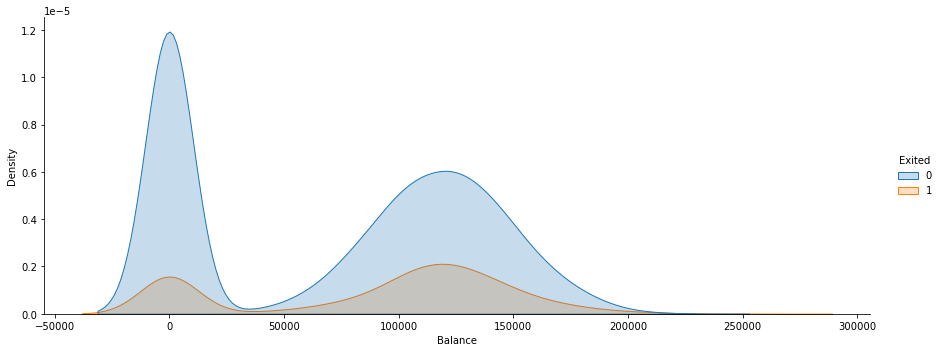

In [158]:
sns.displot(churn_data, x='Balance', hue='Exited', kind='kde', fill=True, aspect=2.5)
plt.show()

В обоих случаях распределения распределения бимодальные, причем пиковые значения совпадают. Большая часть оставшихся с нулевым балансом, в то время как ушедшие по большей части с положительным балансом. По данным цифрам сложно сказать, что может не устраивать клиентов. Возможно отсутсвие особенных условий для клиентов с высоким положительным балансом.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

<Figure size 720x1080 with 0 Axes>

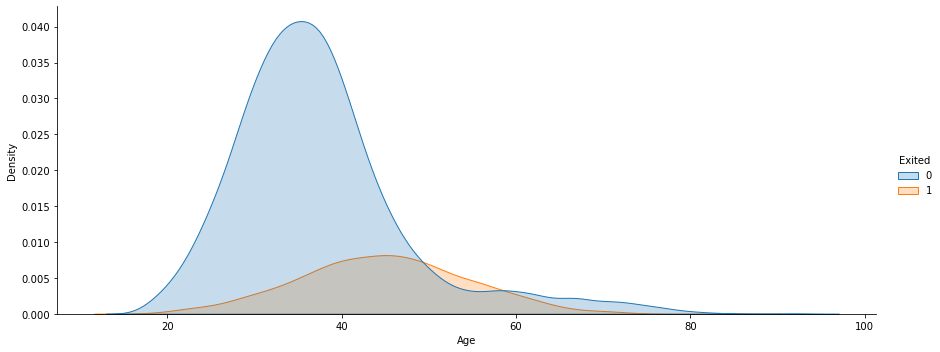

In [162]:
plt.figure(figsize=(10, 15))
sns.displot(churn_data, x='Age', hue='Exited', kind='kde', fill=True, aspect=2.5)
plt.show()

В группе лояльных клиентов больше выбросов по возрасту в сторону более старших. Как видно из распределений ушедшие это более зрелая возрастная часть 40-50 лет. Соответственно нужно работать с данной категорией клиентов

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

<AxesSubplot:xlabel='EstimatedSalary', ylabel='CreditScore'>

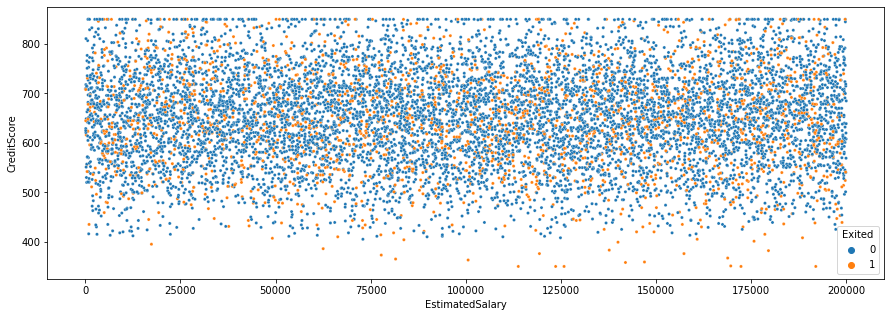

In [47]:
plt.figure(figsize=(15,5))
sns.scatterplot(
    data=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited',
    s=10,
    #size='sex',
)

Судя по графику связь кредитного рейтинга и предполагаемый зарплаты отсутсвует

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

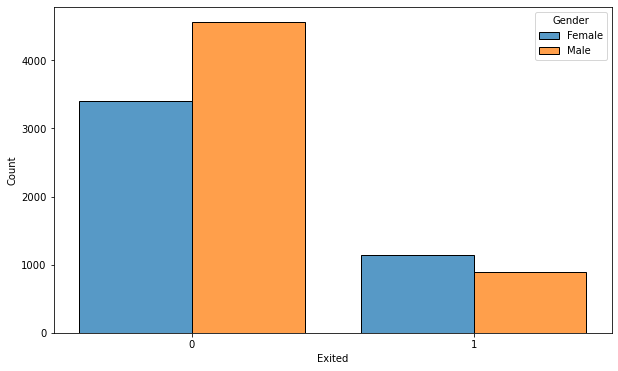

In [165]:
plt.figure(figsize=(10, 6))
sns.histplot(churn_data, x='Exited', hue='Gender', fill=True, multiple="dodge", discrete=True, shrink=0.8)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()

Чаще уходят женщины, хотя и не на много

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

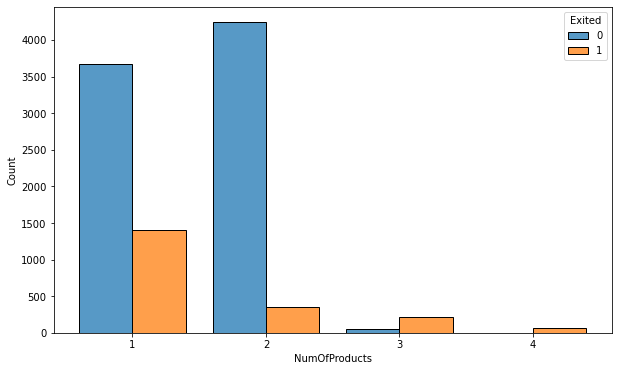

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(churn_data.astype({'NumOfProducts': 'object'}), 
             x='NumOfProducts', 
             hue='Exited', 
             multiple="dodge", 
             element='bars',
             shrink=0.8,
             discrete=True)


plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()

Клиенты приобретавшие 3 и 4 услуги почти польностью покинули банк.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

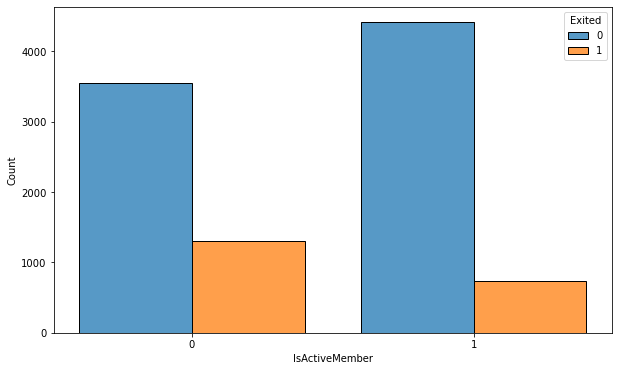

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(churn_data, 
             x='IsActiveMember', 
             hue='Exited', 
             multiple="dodge", 
             element='bars',
             shrink=0.8,
             discrete=True)

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()

Большая часть ушедших - неактивные клинты. Неактивных клиентов можно превратить в активных, заманив особыми условиями.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [166]:
country_exited_pv = churn_data.pivot_table(values='Exited',
                                           index='Geography',
                                           aggfunc=lambda x: x.sum()/len(x)
                                            )
churn_data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [72]:
#строим график
fig = px.choropleth(
    data_frame=country_exited_pv, #DataFrame
    locations=country_exited_pv.index, #столбец с локациями
    locationmode = 'country names', #режим сопоставления локаций с базой Plotly
    color='Exited', #от чего зависит цвет
    #animation_frame="date", #анимационный бегунок
    range_color=[country_exited_pv.min()[0], country_exited_pv.max()[0]], #диапазон цвета
    title='Exited clients', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

Больше всего ушедших в Германии. Возможно низкая степень присутсвия в стране.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [76]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [79]:
churn_data['CreditScoreCat'].value_counts()

Good         3703
Poor         2434
Fair         2281
Excellent     950
Very_Poor     632
Name: CreditScoreCat, dtype: int64

In [81]:
credit_score_pv = churn_data.pivot_table(index='CreditScoreCat',
                                         columns='Tenure',
                                         values='Exited',
                                         aggfunc=np.mean)
credit_score_pv

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


Text(0.5, 1.0, 'Доля ушедших клиентов от кредитного рейтинга и времени обслуживания')

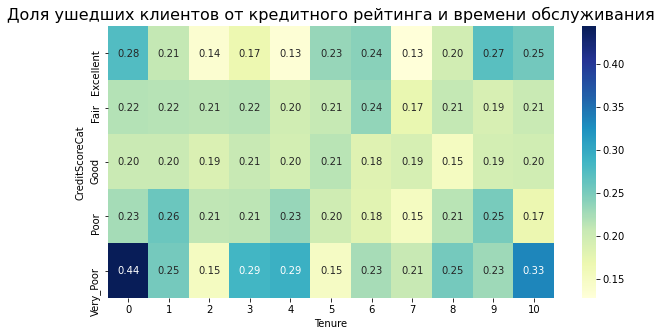

In [86]:
fig = plt.figure(figsize=(10,5))
heatmap = sns.heatmap(data=credit_score_pv, cmap='YlGnBu', annot=True, fmt='.2f')
heatmap.set_title('Доля ушедших клиентов от кредитного рейтинга и времени обслуживания', fontsize=16)

Чаще всего уходят клиенты с низким рейтингом, особенно в начале обсулуживания. Следом как ни странно уходят с наиболее надежным рейтингом причем также в самом начале. 